In [127]:
import sys
import os

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)
 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [129]:
df_raw = pd.read_excel("../data/raw/BASE DATOS CON CIE-10_Actualizada 25-07-2023.xls")

In [130]:
df = pd.read_csv("../data/processed/df_procesada.csv")

In [142]:
# Eliminamos las filas que no tienen fecha de evaluación
df_limpia = df.dropna(subset="fecha_1_evaluacion").copy()
df_limpia["fecha_1_evaluacion"] = pd.to_datetime(df_limpia["fecha_1_evaluacion"])
df_limpia["f_nac"] = pd.to_datetime(df_limpia["f_nac"])
df_limpia["edad_1_evaluacion_calc"] = (df_limpia["fecha_1_evaluacion"] - df_limpia["f_nac"]).dt.days / 365

In [148]:
# Obtiene la cantidad de pacientes anuales
cantidad_de_pacientes = df_limpia.groupby("anio_1_evaluacion")["rut"].nunique()

# Obtiene la distribucion de la prevision a lo largo de los anios
prevision = df_limpia.groupby("anio_1_evaluacion")["prevision"].value_counts().unstack()
prevision.loc["Total", :] =  prevision.sum()

# Obtiene la distribucion de la 1era edad de consulta
edad_primera_consulta = df_limpia.groupby("anio_1_evaluacion")["edad_1_evaluacion_calc"].describe()

<Axes: xlabel='anio_1_evaluacion'>

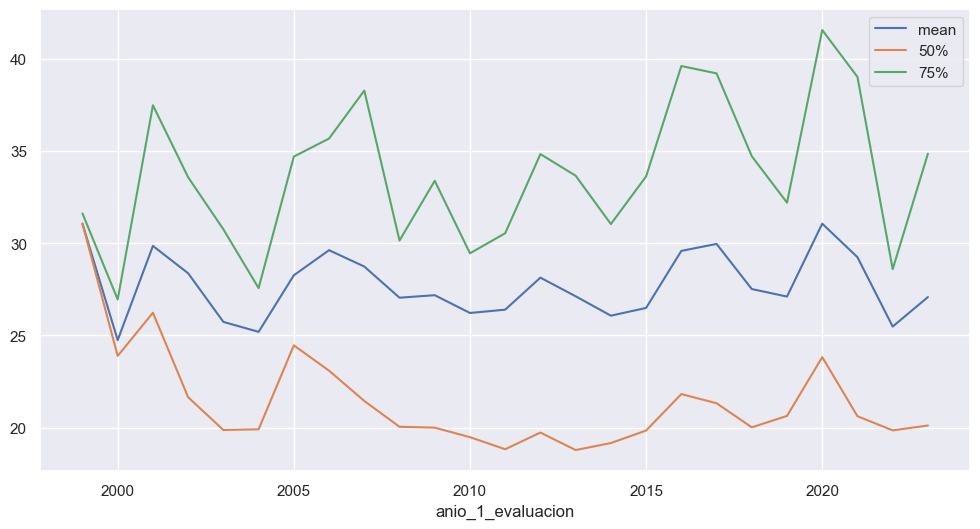

In [152]:
edad_primera_consulta[["mean", "50%", "75%"]].plot()